GRAPH==
0 == [[0, 1], [1, 0]]
1 == [[1, 1], [2, 0], [0, 0]]
2 == [[2, 1], [3, 0], [1, 0]]
3 == [[3, 1], [4, 0], [2, 0]]
4 == [[4, 1], [5, 0], [3, 0]]
5 == [[5, 1], [6, 0], [4, 0]]
6 == [[6, 1], [7, 0], [5, 0]]
7 == [[7, 1], [8, 0], [6, 0]]
8 == [[8, 1], [9, 0], [7, 0]]
9 == [[9, 1], [8, 0]]
10 == [[0, 2], [0, 0], [1, 1]]
11 == [[1, 2], [1, 0], [2, 1], [0, 1]]
12 == [[2, 2], [2, 0], [3, 1], [1, 1]]
13 == [[3, 2], [3, 0], [4, 1], [2, 1]]
14 == [[4, 2], [4, 0], [5, 1], [3, 1]]
15 == [[5, 2], [5, 0], [6, 1], [4, 1]]
16 == [[6, 2], [6, 0], [7, 1], [5, 1]]
17 == [[7, 2], [7, 0], [8, 1], [6, 1]]
18 == [[8, 2], [8, 0], [9, 1], [7, 1]]
19 == [[9, 2], [9, 0], [8, 1]]
20 == [[0, 3], [0, 1], [1, 2]]
21 == [[1, 3], [1, 1], [2, 2], [0, 2]]
22 == [[2, 3], [2, 1], [3, 2], [1, 2]]
23 == [[3, 1], [4, 2], [2, 2]]
24 == [[4, 1], [5, 2], [3, 2]]
25 == [[5, 1], [6, 2], [4, 2]]
26 == [[6, 3], [6, 1], [7, 2], [5, 2]]
27 == [[7, 3], [7, 1], [8, 2], [6, 2]]
28 == [[8, 3], [8, 1], [9, 2], [7, 2]]
29 == [[9, 3], 

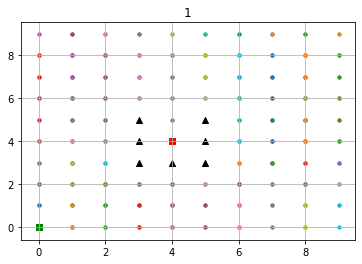

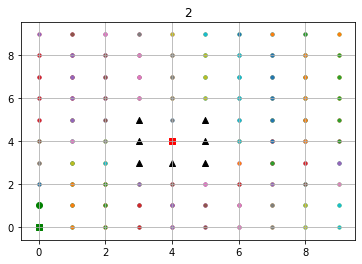

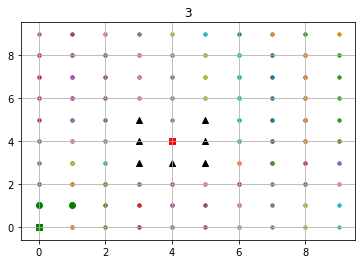

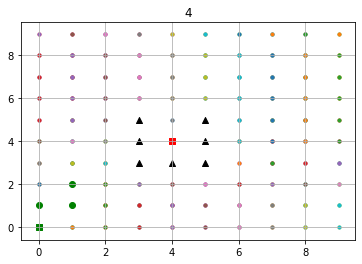

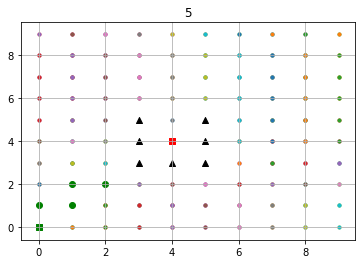

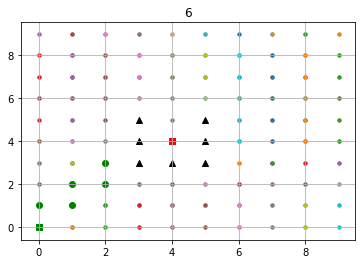

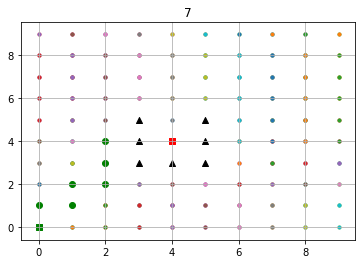

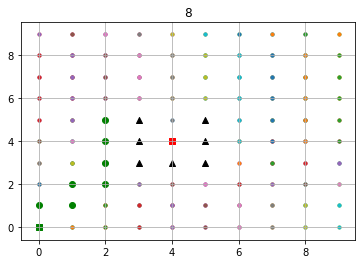

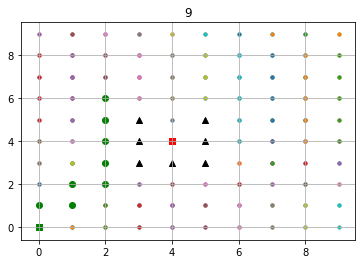

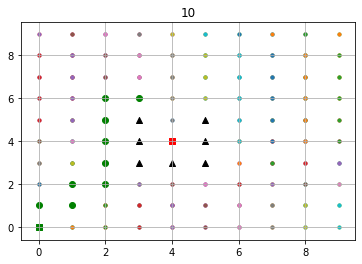

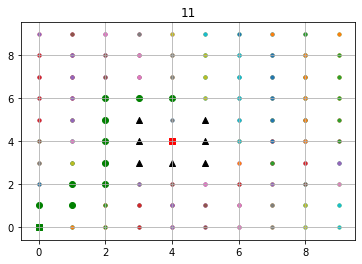

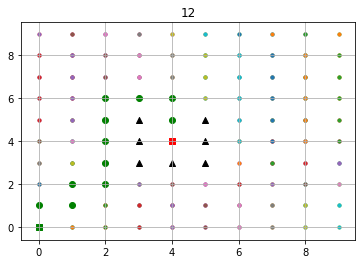

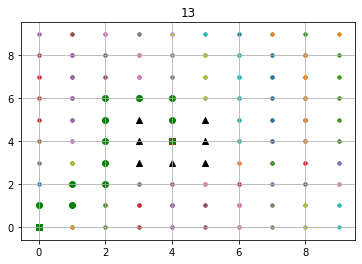

PATH== [[0, 0], [0, 1], [1, 1], [1, 2], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [3, 6], [4, 6], [4, 5], [4, 4]]


In [217]:
import numpy as np
from matplotlib import pyplot as plt

import queue as Q

#functions
#to empty the queue
def empty_q(q):
    while not q.empty():
        q.get()
#to output the index of input point in the graph
def index(point, n):
    return int(point[0]+(n*point[1]))
#adding edges to graph i.e. preparing its adjacency list by adding edges
def making_graph(n, diag, obstacles):
    graph=[]
    for i in range(n*n):
        u=[]
        graph.append(u)
    k=0
    for i in range(n):
        for j in range(n):
            if(i+1<=n-1 and ([j, i+1] not in obstacles)):
                graph[k].append([j, i+1])
            if(i-1>=0   and ([j, i-1] not in obstacles)):
                graph[k].append([j, i-1])
            if(j+1<=n-1 and ([j+1, i] not in obstacles)):
                graph[k].append([j+1, i])
            if(j-1>=0   and ([j-1, i] not in obstacles)):
                graph[k].append([j-1, i])
            if(diag):
                if(i+1<=n-1 and j-1>=0   and ([j-1, i+1] not in obstacles)):
                    graph[k].append([j-1, i+1])
                if(i+1<=n-1 and j+1<=n-1 and ([j+1, i+1] not in obstacles)):
                    graph[k].append([j+1, i+1])
                if(i-1>=0   and j+1<=n-1 and ([j+1, i-1] not in obstacles)):
                    graph[k].append([j+1, i-1])
                if(i-1>=0   and j-1>=0   and ([j-1, i-1] not in obstacles)):
                    graph[k].append([j-1, i-1])
            k+=1
    for ele in obstacles:
        graph[index(ele, n)]=[]
    return graph
#plotting graph's nodes, obstacles, start, end 
def plot_graph(n, graph, obstacles, start, end):
    for v in graph:
        if v not in obstacles and (v!=[]):
            v=np.array(v)
            plt.scatter(v[:, 0], v[:, 1], marker='.')
    plt.scatter(start[0], start[1], color='green', marker='s')
    plt.scatter(end[0], end[1], color='red', marker='s')
    for obs in obstacles:
        plt.scatter(obs[0], obs[1], color='k', marker='^')
    plt.grid(True)
    plt.title("PUZZLE GRAPH")

#NOTE: here we are using two types of functions as heuristic function
#its your freedom to choose any heuristic function

#euclidean distance function
def euclidean(curr, goal):
    return (((curr[0]-goal[0])**2)+((curr[1]-goal[1])**2))**0.5
#manahttan distance
def manhattan(curr, goal):
    return (abs(curr[0]-goal[0])+abs(curr[1]-goal[1]))



#GRAPH SEARCH using a_star search algorithm
def a_star_algorithm(graph, n, start, end):
    expl_list=[]
    path=[]
    q=Q.PriorityQueue()
    
    
    gn=0
    hn=euclidean(start, end)
    fn=gn+hn
    q.put([fn, start])
    step=1
    while not q.empty():
        curr=q.get()
        empty_q(q)
        expl_list.append(curr[1])
        path.append(curr[1])
        plot_graph(n, g, obstacles, start, end)
        for ele in path:
            plt.scatter(ele[0], ele[1], color='green')
        plt.grid(True)
        plt.title(step)
        plt.show()
        
        if(curr[1]==end):
            break
        gn=gn+1
        for neighbour in graph[index(curr[1], n)]:
            if neighbour not in expl_list:
                hn=euclidean(neighbour, end)
                fn=gn+hn
                q.put([fn, neighbour])
        step+=1
    return path


#calling functions
n=10
#diag is True if diagonal paths are allowed
diag=False
#start and end points of the search algorithm
start=[0, 0]
end=[4, 4]
#add obstacles as you wish
obstacles=[[3, 3], [4, 3], [5, 3], [3, 4], [5, 4], [3, 5], [5, 5]]
#function to make graph
g = making_graph(n, diag, obstacles)
print("GRAPH==")
for i in range(n*n):
    print(i, "==", g[i])
#NOTE: g is an adjacency list representation of graph

#a_star algorithm to run the search and print the path taken while
#searching the end from start, avoiding obstacles in between :)
path=[]
path=a_star_algorithm(g, n, start, end)
print("PATH==", path)
#NOTE: path is path taken during the search algorithm and not
#the shortest path, printing shortest path takes some extra
#effort but not so difficult
